In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

minimum_scale = 1 #the minimum scale of the voltage meter (V)
zero_error = 0

data = pd.read_csv("slopeuncertainty.csv", index_col="Current(A)")

In [17]:
import math
best_estimation = np.array([0, 0, 0, 0, 0], dtype=np.float32)
uncertainty = np.array([0, 0, 0, 0, 0], dtype=np.float32)
for i in range(5):
    best_estimation[i] = np.average(data.iloc[[i]])
    uncertainty[i] = math.sqrt((np.std(data.iloc[i], ddof=1)/math.sqrt(5))**2 + 1/(2*math.sqrt(3)))
best_estimation

array([ 3.48,  6.42,  9.2 , 12.32, 15.14], dtype=float32)

In [55]:
uncertainty

array([0.57885677, 0.5840164 , 0.5870904 , 0.54870313, 0.5525171 ],
      dtype=float32)

In [19]:
from sklearn.linear_model import LinearRegression

X = np.linspace(1, 5, 5).reshape(-1, 1)
y = best_estimation.reshape(-1, 1)
LinearRegressor = LinearRegression().fit(X, y)
LinearRegressor.coef_

array([[2.92200003]])

In [20]:
X.shape

(5, 1)

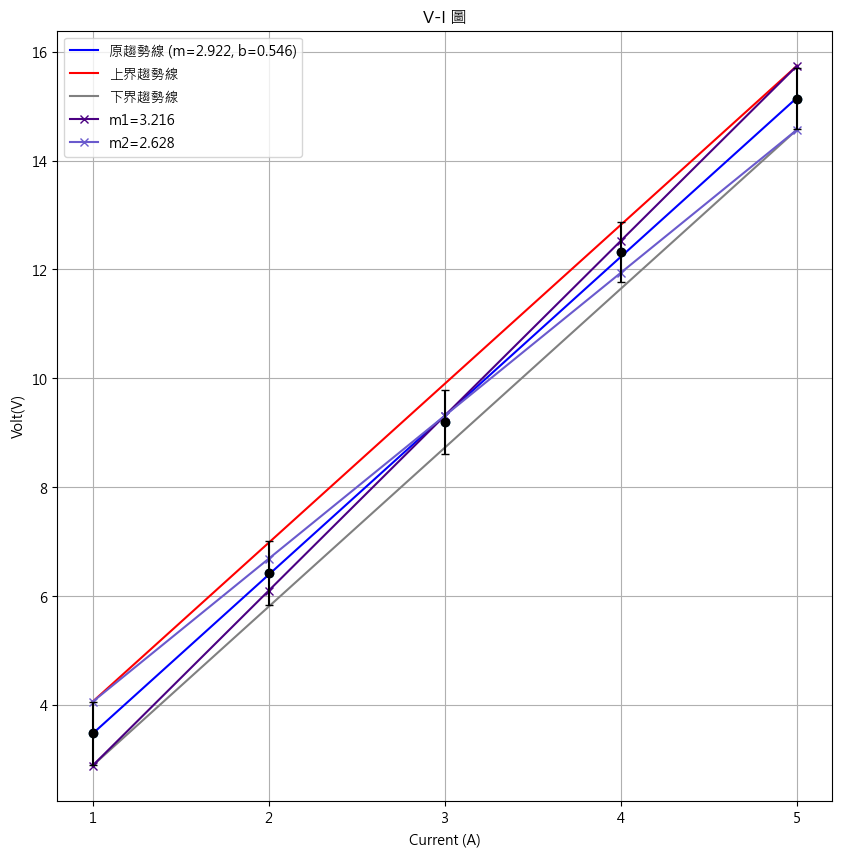

In [54]:
import matplotlib

matplotlib.rc('font', family='Microsoft JhengHei')

m1 = ((5*LinearRegressor.coef_[0][0] + np.max(uncertainty)) - (1*LinearRegressor.coef_[0][0] - np.max(uncertainty)))/4
m2 = ((5*LinearRegressor.coef_[0][0] - np.max(uncertainty)) - (1*LinearRegressor.coef_[0][0] + np.max(uncertainty)))/4

plt.figure(figsize=(10, 10))
plt.plot(X, best_estimation, 'o')
plt.plot(np.linspace(1, 5, 5).reshape(-1, 1), np.linspace(1, 5, 5).reshape(-1, 1)*LinearRegressor.coef_+LinearRegressor.intercept_, 
         'b', label="原趨勢線 (m={}, b={})".format(round(LinearRegressor.coef_[0][0], 3), round(LinearRegressor.intercept_[0], 3)))
plt.plot(X, X*LinearRegressor.coef_+LinearRegressor.intercept_+np.max(uncertainty), 'r', label="上界趨勢線")
plt.plot(X, X*LinearRegressor.coef_+LinearRegressor.intercept_-np.max(uncertainty), c='grey', label="下界趨勢線")
plt.plot(X, X*m1 + (5*LinearRegressor.coef_+LinearRegressor.intercept_+np.max(uncertainty))-5*m1,'x-',  label="m1={}".format(round(m1, 3)), c='indigo')
plt.plot(X, X*m2+ (5*LinearRegressor.coef_+LinearRegressor.intercept_-np.max(uncertainty))-5*m2,'x-',label="m2={}".format(round(m2, 3)), c='slateblue')
plt.errorbar(X, best_estimation, yerr=uncertainty, fmt='o', c="black", capsize=3)
plt.xlabel("Current (A)")
plt.ylabel("Volt(V)")
plt.grid()
plt.xticks([1, 2, 3, 4, 5])
plt.title("V-I 圖")
plt.legend()
plt.savefig(r"C:\Users\clare\OneDrive\圖片\uncertainty_of_slope.png")